# Emerging Technologies Project


## Introduction

Quantum computing is a new way of performing computation.  
It differs from classical computation by utilizing Q-bits instead of normal bits
to perform a new type of computation that classical computation would  
take much longer to compute.


### Deutsch's algorithm

Deutsch's algorithm is a quantum algorithm that determines whether a given Boolean function is constant or balanced.

- A constant function is one that always returns the same value, regardless of the input.
- A balanced function is one that returns 0 for half of the inputs and 1 for the other half.

It can be represented using the following equation:

Deutsch's algorithm takes in 1 bit that are 0 or 1 and outputs a 1 bits also 0 or 1

$\Sigma = \{0,1\}$

$f : \Sigma\rightarrow \Sigma$

The algorithm outputs 0 for constant and 1 for balanced

Below are all the possible input function in a table

| function $f(x)$ | $x=0$ | $x=1$ | $f(0) ⨁ f(1)$ |
| --------------- | ----- | ----- | ------------- |
| $f_0$           | 0     | 0     | 0             |
| $f_1$           | 0     | 1     | 1             |
| $f_2$           | 1     | 0     | 1             |
| $f_3$           | 1     | 1     | 0             |

It is effective doing the xor operation from classical computing.


For quantum simulation in python I can use Qiskit.  
It is a library that we can use to run quantum simulations and make circuits.

Matplotlib will be used for visualising the circuit diagrams generated from qiskit.


In [305]:
from qiskit import QuantumCircuit, Aer, execute, transpile, assemble
import matplotlib.pyplot as plt


In [306]:
def deutsch_algorithm_circuit(function: QuantumCircuit) -> QuantumCircuit:
    """
    Implements Deutsch's algorithm to determine whether a function f is constant or balanced.

    Arguments:
        function (QuantumCircuit): The function to evaluate.

    Returns:
        QuantumCircuit: The Deutsch algorithm circuit.
    """

    qc = QuantumCircuit(2, 1)

    qc.x(1)

    # Apply Hadamard gates to both qubits
    qc.h(range(2))

    qc.barrier()

    # Combine the functions into a single circuit
    qc.compose(function, range(2), inplace=True)

    qc.barrier()

    # Apply Hadamard gates to qubit 0
    qc.h(0)

    qc.barrier()

    # # Measure the first qubit
    qc.measure(0, 0)

    return qc


In [307]:
def simulate_deutsch_algorithm(deutsch_circuit: QuantumCircuit) -> str:
    """
    Aer simulation of Deutsch's algorithm.

    Arguments:
        deutsch_circuit (QuantumCircuit): The Deutsch algorithm circuit.

    Returns:
        str: The function is either "constant" or "balanced".
    """

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')

    result = simulator.run(deutsch_circuit).result().get_counts()

    # Determine whether the function is constant or balanced
    # if there are more 0s than 1s, the function is constant
    if int(result["0"])> int(result["1"]):
        return "constant"  # Function is constant
    else:
        return "balanced"  # Function is balanced


This is the first circuit it does nothing and is of type constant.


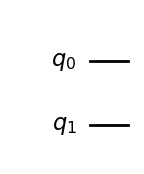

In [308]:
# Define the functions
constantCircuitA = QuantumCircuit(2)
constantCircuitA.draw(output='mpl')


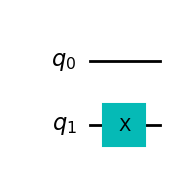

In [309]:
# Define the functions
constantCircuitB = QuantumCircuit(2)
constantCircuitB.x(1)
constantCircuitB.draw(output='mpl')


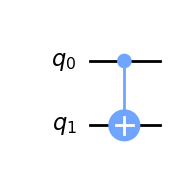

In [310]:
# Define the functions
balancedCircuitA = QuantumCircuit(2)
balancedCircuitA.cnot(0, 1)
balancedCircuitA.draw(output='mpl')


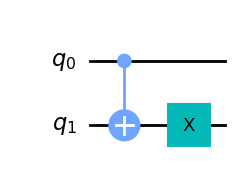

In [311]:
# Define the functions
balancedCircuitB = QuantumCircuit(2)
balancedCircuitB.cnot(0, 1)
balancedCircuitB.x(1)
balancedCircuitB.draw(output='mpl')


In [312]:
input_functions = [
    constantCircuitA, constantCircuitB, balancedCircuitA, balancedCircuitB
]


In [313]:
circuits = [deutsch_algorithm_circuit(f) for f in input_functions]


KeyError: '1'

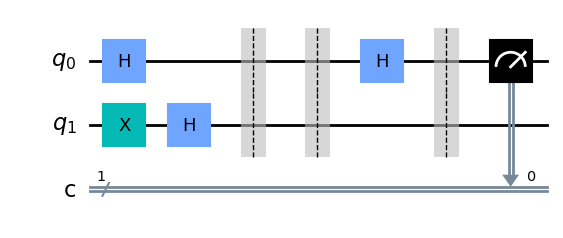

In [314]:
for circuit in circuits:
    plt.figure(circuit.draw(output='mpl'))
    # Determine whether the circuit is constant or balanced
    print(simulate_deutsch_algorithm(circuit))
    plt.show()


## References:

- https://www.youtube.com/watch?v=CytwIKt1P_0
- https://anonymousket.medium.com/quantum-algo-deutsch-algorithm-ccc119c69c08
- https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html
